In [1]:
#%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd

df = pd.DataFrame(
    np.random.rand(100, 2),
    columns=['Group A', 'Group B']
)

df.describe()

,Group A,Group B
count,100.000000,100.000000
mean,0.478352,0.537455
std,0.290683,0.290261
min,0.002677,0.019518
25%,0.221651,0.297160
50%,0.453660,0.599493
75%,0.759137,0.792221
max,0.992294,0.998876


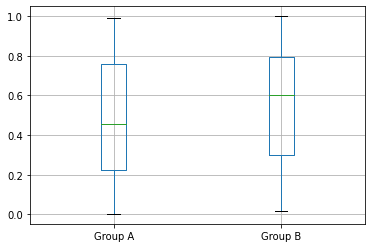

In [2]:
df.boxplot();

In [3]:
# Statistics module of the scipy package
from scipy import stats

In [4]:
# Plotting package import
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [5]:
# Format tables printed to the screen
%load_ext google.colab.data_table

In [6]:
from google.colab import files
uploaded = files.upload()

Saving kaggle_survey_2020_responses.csv to kaggle_survey_2020_responses.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kaggle_survey_2020_responses.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



In [8]:
# Drop first row containing metadata
df.drop(0, axis=0, inplace=True)
# First five rows of data
df[:5]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(20036, 355)

###RESPONDENT QUALIFICATIONS

Calculating the frequency of different (highest) qualifications

In [10]:
# Frequency of sample space elements for Q4 (highest qualification)
df.Q4.value_counts()

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

In [11]:
go.Figure(
    go.Bar(
        y=df.Q4.value_counts().index.tolist(),
        x=df.Q4.value_counts().values.tolist(),
        orientation='h'
    )
).update_layout(
    title='Highest qualification',
    xaxis={'title':'Count'}
)

In [12]:
go.Figure(
    go.Bar(
        x=['Total'],
        y=[df.shape[0]],
        name='Total'
    )
).add_trace(
    go.Bar(
        x=['Python'],
        y=df.Q7_Part_1.value_counts().values.tolist(),
        name='Python'
    )
).add_trace(
    go.Bar(
        x=['R'],
        y=df.Q7_Part_2.value_counts().values.tolist(),
        name='R'
    )
).add_trace(
    go.Bar(
        x=['C'],
        y=df.Q7_Part_4.value_counts().values.tolist(),
        name='R'
    )
).add_trace(
    go.Bar(
        x=['SQL'],
        y=df.Q7_Part_3.value_counts().values.tolist(),
        name='SQL'
    )
).update_layout(title='Commonly used Data Science languages',
                xaxis={'title':'Count'},
                yaxis={'title':'Language'})

CODING ENVIRONMENTS

In [13]:
go.Figure(
    go.Bar(
        x=['Total'],
        y=[df.shape[0]],
        name='Total'
    )
).add_trace(
    go.Bar(
        x=['Jupyter'],
        y=df.Q9_Part_1.value_counts().values.tolist(),
        name='Jupyter'
    )
).add_trace(
    go.Bar(
        x=['RStudio'],
        y=df.Q9_Part_2.value_counts().values.tolist(),
        name='R'
    )
).add_trace(
    go.Bar(
        x=['PyCharm'],
        y=df.Q7_Part_5.value_counts().values.tolist(),
        name='R'
    )
).add_trace(
    go.Bar(
        x=['VS Code'],
        y=df.Q7_Part_4.value_counts().values.tolist(),
        name='R'
    )
).update_layout(title='Commonly used Data Science coding environments',
                xaxis={'title':'Count'},
                yaxis={'title':'Environment'})

INCOME

In [14]:
# Saving an ordered list of the brackets as dictionary key-value pairs
income_brackets = {
    '$0-999':2128,
    '1,000-1,999':581,
    '2,000-2,999':330,
    '3,000-3,999':264,
    '4,000-4,999':279,
    '5,000-7,499':488,
    '7,500-9,999':371,
    '10,000-14,999':665,
    '15,000-19,999':449,
    '20,000-24,999':404,
    '25,000-29,999':310,
    '30,000-39,999':540,
    '40,000-49,999':552,
    '50,000-59,999':510,
    '60,000-69,999':408,
    '70,000-79,999':394,
    '80,000-89,999':273,
    '90,000-99,999':280,
    '100,000-124,999':573,
    '125,000-149,999':315,
    '150,000-199,999':347,
    '200,000-249,999':115,
    '250,000-299,999':48,
    '300,000-500,000':55,
    '> $500,000':50
}

go.Figure(
    go.Bar(
        x=list(income_brackets.keys()),
        y=list(income_brackets.values())
    )
).update_layout(
    title='Income',
    yaxis={'title':'USD'}
)

###INCOME DIFFERENCES FOR WOMEN

In [15]:
# All high income brackets (above $100000)
high_income = ['100,000-124,999',
               '125,000-149,999',
               '150,000-199,999',
               '200,000-249,999',
               '250,000-299,999',
               '300,000-500,000',
               '> $500,000']

In [16]:
# Add a new column for income above and below $100000
df['HighIncome'] = np.where(df.Q24.isin(high_income), 'Yes', 'No')

In [17]:
# Select only binary sex participants
binary_gender = df.loc[(df.Q2 == 'Man') | (df.Q2 == 'Woman')]

In [18]:
# Contigency table of observed values
pd.crosstab(
    binary_gender.Q2,
    binary_gender.HighIncome,
    margins=True
)

HighIncome,No,Yes,All
Q2,,,
Man,14494,1295,15789
Woman,3706,172,3878
All,18200,1467,19667


In [19]:
# Relative frequency observed value contingency table
pd.crosstab(
    binary_gender.Q2,
    binary_gender.HighIncome,
    margins=True,
    normalize=True
)

HighIncome,No,Yes,All
Q2,,,
Man,0.736971,0.065846,0.802817
Woman,0.188437,0.008746,0.197183
All,0.925408,0.074592,1.000000


A  𝜒2  test for independence can investigate the dependence between sex and income.

In [20]:
stats.chi2_contingency([[14494, 1295], [3706, 172]])

(63.444674249142516,
 1.6493472192256754e-15,
 1,
 array([[14611.26760563,  1177.73239437],
        [ 3588.73239437,   289.26760563]]))

There was a significant association between gender and high income status,  𝜒2  value  63,4 , p value  <0.01 

##UNITED STATES OF AMERICA VS SOUTH AFRICA

Investigating if there is a dependence between country (United States of America and South Africa) and income level (again using the  100000  USD cut-off

In [21]:
usa_sa_df = df.loc[df.Q3.isin(['South Africa', 'United States of America'])]

In [22]:
pd.crosstab(
    usa_sa_df.Q3,
    usa_sa_df.HighIncome,
    margins=True
)

HighIncome,No,Yes,All
Q3,,,
South Africa,133,8,141
United States of America,1406,831,2237
All,1539,839,2378


In [23]:
stats.chi2_contingency(
    pd.crosstab(
        usa_sa_df.Q3,
        usa_sa_df.HighIncome
    )
)

(56.17463007230668,
 6.631168127655343e-14,
 1,
 array([[  91.25273339,   49.74726661],
        [1447.74726661,  789.25273339]]))

A total of 2237 respondents where from the USA compared to only 141 from South Africa. Thirty-seven percent of the American respondents where in the high income bracket compared to only 5.7% of the South African respondents, 𝜒2 value 56.2, p value  <0.01

#PREDICTING INCOME BRACKET USING MACHINE LEARNING

Generating a random forest machine learning model and use age, sex, country, highest qualification, and whether the respondent uses Python as feature variable in a supervised learning application, predicting income level (high or not).

In [24]:
# Selecting the feature and target variables
variables = [
             'Q1',
             'Q2',
             'Q3',
             'Q4',
             'Q7_Part_1',
             'HighIncome'
]

rf_data = df[variables]

In [25]:
!pip install tensorflow_decision_forests

     |████████████████████████████████| 6.3 MB 4.8 MB/s 


In [26]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf

In [27]:
classes = rf_data.HighIncome.unique().tolist() # A list of the two income classes
classes

['No', 'Yes']

In [28]:
rf_data.HighIncome = rf_data.HighIncome.map(classes.index)

The data set is split into a training set, which the decision forest model will use to learn from, and a test set, against whichh we can evaluate the trained machine learning model

In [29]:
def split(ds, r=0.3):
  test_ind = np.random.rand(len(ds)) < r

  return ds[~test_ind], ds[test_ind]

In [30]:
rf_data_train, rf_data_test = split(rf_data)

There is class imbalance with  92 % of respondents not in the high income brakcet. Simply predicting NOT HIGH INCLOME BRACKET for all cases, makes you  93 % correct all the time. Our model will have to beat this metric

In [31]:
rf_data_train.HighIncome.value_counts(normalize=True)

0    0.925754
1    0.074246
Name: HighIncome, dtype: float64

The decision forest class is instantiated and the model compiles, prior to passing the training data to the model

In [32]:
rf_model = tfdf.keras.RandomForestModel()

In [33]:
rf_model.compile(
    metrics=['accuracy']
)

In [34]:
rf_data_train = tfdf.keras.pd_dataframe_to_tf_dataset(
    rf_data_train,
    label='HighIncome'
)
rf_data_test = tfdf.keras.pd_dataframe_to_tf_dataset(
    rf_data_test,
    label='HighIncome'
)

In [35]:
rf_model.fit(
    x=rf_data_train
)

220/220 [==============================] - 5s 1ms/step


In [36]:
evaluation = rf_model.evaluate(
    rf_data_test,
    return_dict=True # Returning a dictionary of metrics
)

94/94 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9239


In [37]:
evaluation.keys() # Metric dictionary keys

dict_keys(['loss', 'accuracy'])

In [38]:
evaluation.values() # Metric values

dict_values([0.0, 0.9238570332527161])

In [39]:
tfdf.model_plotter.plot_model_in_colab(
    rf_model,
    tree_idx=0,
    max_depth=4
)

In [40]:
rf_model.make_inspector().variable_importances()

{'MEAN_MIN_DEPTH': [("Q7_Part_1" (4; #4), 10.480881789810748),
  ("__LABEL" (4; #5), 10.480881789810748),
  ("Q2" (4; #1), 5.317659934212413),
  ("Q4" (4; #3), 4.880165761324752),
  ("Q1" (4; #0), 0.9999999999999961),
  ("Q3" (4; #2), 0.0)],
 'NUM_AS_ROOT': [("Q3" (4; #2), 300.0)],
 'NUM_NODES': [("Q3" (4; #2), 32247.0),
  ("Q1" (4; #0), 30045.0),
  ("Q4" (4; #3), 25177.0),
  ("Q2" (4; #1), 7874.0)],
 'SUM_SCORE': [("Q3" (4; #2), 369529.8920049312),
  ("Q1" (4; #0), 136110.45305653237),
  ("Q4" (4; #3), 47679.63948504066),
  ("Q2" (4; #1), 21506.978297129914)]}